# Productivity Predictor

## Goal

Productivity Prediction of Garment Employees

## Data

We will use the [Productivity Prediction of Garment Employees](https://archive.ics.uci.edu/dataset/597/productivity+prediction+of+garment+employees) set from the UCI Machine Learning Repository. 

- **date**			:	Date in MM-DD-YYYY
- **day**			:	Day of the Week
- **quarter**			:	A portion of the month. A month was divided into four quarters
- **department**		:	Associated department with the instance
- **team_no**			:	Associated team number with the instance
- **no_of_workers**		:	Number of workers in each team
- **no_of_style_change**	:	Number of changes in the style of a particular product
- **targeted_productivity**	:	Targeted productivity set by the Authority for each team for each day.
- **smv**			:	Standard Minute Value, it is the allocated time for a task
- **wip**			:	Work in progress. Includes the number of unfinished items for products
- **over_time**		:	Represents the amount of overtime by each team in minutes
- **incentive**		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
- **idle_time**		:	The amount of time when the production was interrupted due to several reasons
- **idle_men**		:	The number of workers who were idle due to production interruption
- **actual_productivity**	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.

The data can be used to predict the productivity or to classify it by stratifying the target variable

## Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split, GridSearchCV



## Model Development

### Load data

In [2]:
prod = pd.read_csv('data/garments_worker_productivity.csv')

### EDA

In [3]:
prod.shape

(1197, 15)

In [4]:
 prod.isna().sum() / prod.shape[0] * 100.0

date                      0.000000
quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
dtype: float64

In [5]:
prod.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [6]:
prod_num = list(prod.select_dtypes(['number']).columns)
prod_cat = list(prod.select_dtypes(include=['object']).columns)

In [11]:
for column in prod_cat:
    print(column, ':')
    print(prod[column].unique())
    print('\n')

date :
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


quarter :
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department :
['sweing' 'finishing ' 'finishing']


day :
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']




In [12]:
prod[prod['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


In [22]:
# avg targeted prod per team

tar_prod = round( prod[['team','targeted_productivity']].groupby('team').mean() * 100.0, 2)
tar_prod
# sns.barplot(x='team', y='targeted_productivity', data=tar_prod)

,targeted_productivity
team,
1,74.67
2,73.99
3,74.21
4,71.76
5,67.37
6,73.14
7,71.43
8,70.83
9,75.82


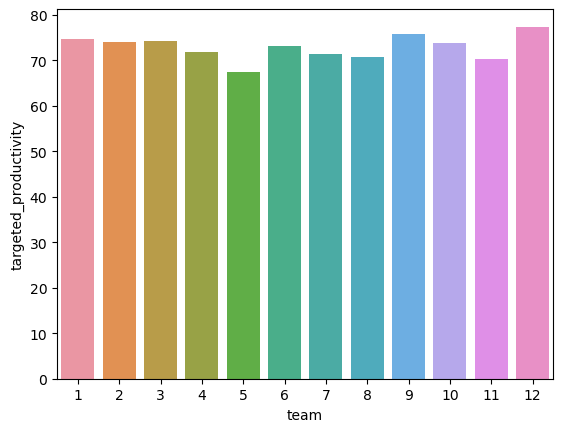

In [23]:
tar_prod = tar_prod.reset_index()
sns.barplot(x='team', y='targeted_productivity', data=tar_prod)
plt.show()

In [28]:
prod['date'] = pd.to_datetime(prod['date'])
prod['day_of_week'] = prod['date'].dt.day_name()
print(prod['day_of_week'].unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


### Observations

- There is a feature with missing data, wip
  - In factories it is an important value, so lets try to save it rather than dropping it
  - Can we assume that the missing data is equals 0?
- The department column has two values for finishing
- The quarter column looks dirty, there's a Quarter5
- No team has a targeted productivity above 80%
- They don't operate on Fridays? That is interesting

Needs cleaning: quarter, department, wip features